<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 2.3 Modelos compartimentales y en tiempo discreto </h3>
<h3 style="text-align: center;"> Ejercicios propuestos </h3>

<h4 style="text-align: center;"> Integrantes: Alejandro Bolaños García y David García Díaz </h4> 

## Ejercicio 1

Partimos del modelo *SIR*, asumiendo individuos homogéneos con red de contactos total. Las ecuaciones que rigen el modelo son 

$$\begin{aligned}
\frac{ds}{dt} &= -\beta s x  \\
\frac{dx}{dt} &= \beta s x - \gamma x\\
\frac{dr}{dt} &= \gamma x,
\end{aligned}$$ 

donde $s$, $x$, $r$ son el porcentaje de susceptibles, infectados y recuperados en la población. El parámetro $\beta$ es la tasa de contagio entre los contactos posibles y $\gamma = 1/T$, siendo $T$ la duración de la enfermedad. 

**Apartado 1.** Extender el modelo asumiendo que $T$ indica la duración exacta de la enfermedad, contabilizando los enfermos que llevan $d$ días desde que enfermaron, con $1<d \leq T$. Tomar como parámetros del modelo los utilizados en los ejercicios de clase. (a) Escribir las ecuaciones del modelo; (b) Comparar la evolución del número total de susceptibles, infectados y recuperados de este modelo extendido con el modelo original; (c) Representar gráficamente las diferencias entre las salidas de un modelo y otro (e.g, número total de infectados) en función de la duración de la enfermedad y otros parámetros.   

### Apartado 1:

En este primer ejercicio se ha implementado un modelo SIR extendido, en el cual se considera la duración exacta de la enfermedad para cada individuo infectado. El modelo tradicional SIR, que clasifica a la población en susceptibles $(S)$, infectados $(I)$ y recuperados $(R)$, ha sido modificado para incluir subcategorías de infectados, agrupados en días desde que enfermaron. Permitiendo una visión más detallada de como progresa la infección, ya que se tiene en cuenta la progresión diaria de la enfermedad y el proceso de recuperación tras un período específico 
$T$ días.

Para resolver el modelo, se definió un sistema de ecuaciones diferenciales donde cada subgrupo de infectados representa a aquellos que llevan $d$ días desde el contagio. Los susceptibles $(S)$ disminuyen conforme entran en contacto con infectados, y el flujo de personas desde el estado de infección a recuperación se ajusta por la duración $T$ de la enfermedad. La implementación muestra la evolución temporal de los tres grupos principales $(S, I, R)$ y de cada subgrupo de infectados a lo largo del tiempo.

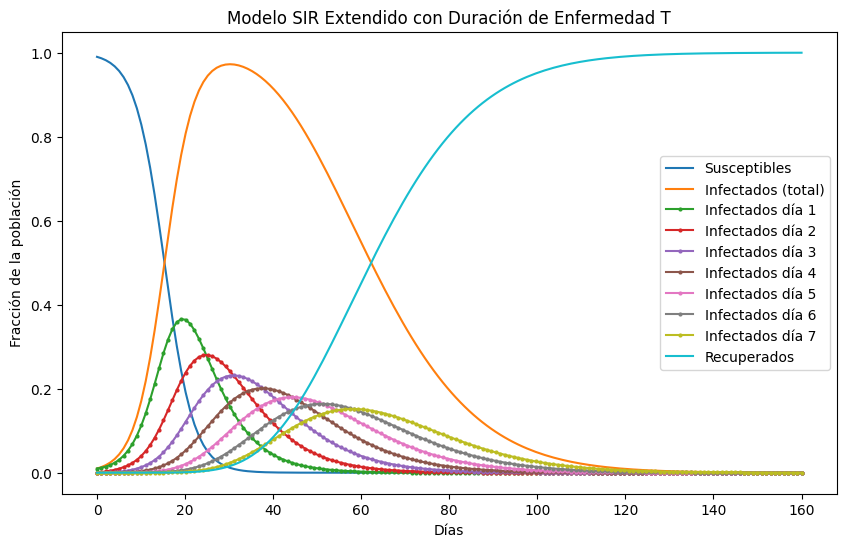

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parámetros del modelo
re = 3         
ri = 0.1       
T = 7          
beta = re*ri   
gamma = 1 / T  

# Condiciones iniciales
s0 = 0.99  
x0 = [0.01] + [0] * (T - 1)  # (solo en x_1 hay infectados inicialmente)
r0 = 0    

# Vector inicial de estado
initial_conditions = [s0] + x0 + [r0]

# Sistema de ecuaciones diferenciales
def model(y, t, beta, gamma, T):
    s = y[0]  
    x = y[1:T+1] 
    r = y[T+1]  

    # Ecuación para los susceptibles
    ds_dt = -beta * s * sum(x)

    # Ecuaciones para los infectados en cada día d
    dx_dt = [0] * T
    dx_dt[0] = beta * s * sum(x) - x[0] / T   # Primer día de infección
    for d in range(1, T-1):
        dx_dt[d] = x[d-1] / T - x[d] / T      # Infectados en el día d
    dx_dt[T-1] = x[T-2] / T - gamma * x[T-1]  # Último día de infección

    # Ecuación para los recuperados
    dr_dt = gamma * x[T-1]

    return [ds_dt] + dx_dt + [dr_dt]


days = 160 
t = np.linspace(0, days, days)

# Solución del sistema de ecuaciones
solution = odeint(model, initial_conditions, t, args=(beta, gamma, T))
s = solution[:, 0]
x = solution[:, 1:T+1]
r = solution[:, T+1]

# Gráfica de resultados
plt.figure(figsize=(10, 6))
plt.plot(t, s, label='Susceptibles')
plt.plot(t, np.sum(x, axis=1), label='Infectados (total)')
for d in range(T):
    plt.plot(t, x[:, d], label=f'Infectados día {d+1}', marker='o', markersize=2)
plt.plot(t, r, label='Recuperados')
plt.xlabel('Días')
plt.ylabel('Fracción de la población')
plt.legend()
plt.title('Modelo SIR Extendido con Duración de Enfermedad T')
plt.show()


Como conclusión, podemos decir que este es el comportamiento típico de una enfermedad, en la que el número de infectados inicialmente crece rápidamente debido al alto número de susceptibles, y a medida que más personas se infectan y se recuperan, el número de susceptibles disminuye, reduciendo la probabilidad de nuevos contagios. 

----------------------------------------------------------------------------------------------------

### Diferencia entre el modelo con los infectados (X) agregados y desagregados:

- Progresión de la Enfermedad: En el modelo desagregado, la progresión de la enfermedad se modela explícitamente, lo que permite una mayor acumulación de infectados en diferentes etapas de la enfermedad. Esto puede resultar en un mayor número total de infectados en cualquier momento dado.

- Tasa de Recuperación: En el modelo agregado, la tasa de recuperación se aplica uniformemente a todos los infectados, lo que puede llevar a una recuperación más rápida y, por lo tanto, a una menor fracción de infectados en cualquier momento dado.

- Interacción entre Subgrupos: En el modelo desagregado, la interacción entre diferentes subgrupos de infectados puede llevar a una mayor transmisión de la enfermedad, ya que los infectados en diferentes etapas pueden tener diferentes tasas de transmisión.

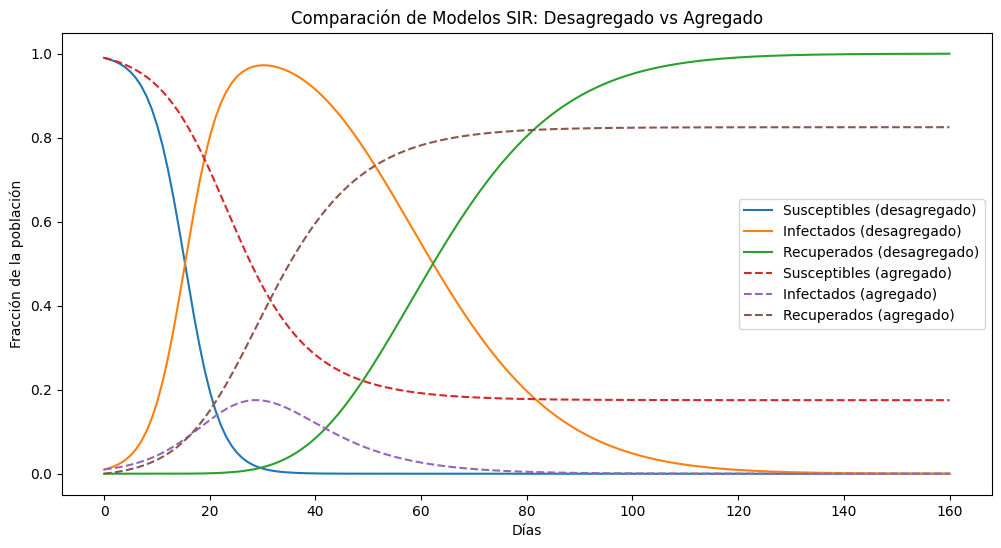

In [2]:
"""Modelo Desagregado"""

# Vector inicial de estado para el modelo desagregado
initial_conditions_desagregado = [s0] + x0 + [r0]

# Sistema de ecuaciones diferenciales para el modelo desagregado
def model_desagregado(y, t, beta, gamma, T):
    s = y[0]  
    x = y[1:T+1]  
    r = y[T+1]  
    
    # Ecuación para los susceptibles
    ds_dt = -beta * s * sum(x)

    # Ecuaciones para los infectados en cada día d
    dx_dt = [0] * T
    dx_dt[0] = beta * s * sum(x) - x[0] / T    # Primer día de infección
    for d in range(1, T-1):
        dx_dt[d] = x[d-1] / T - x[d] / T       # Infectados en el día d
    dx_dt[T-1] = x[T-2] / T - gamma * x[T-1]   # Último día de infección

    # Ecuación para los recuperados
    dr_dt = gamma * x[T-1]

    return [ds_dt] + dx_dt + [dr_dt]



"""Modelo Agregado"""

# Vector inicial de estado para el modelo agregado
initial_conditions_agregado = [s0, 0.01, r0]

# Sistema de ecuaciones diferenciales para el modelo agregado
def model_agregado(y, t, beta, gamma):
    s, i, r = y

    ds_dt = -beta * s * i
    di_dt = beta * s * i - gamma * i
    dr_dt = gamma * i

    return [ds_dt, di_dt, dr_dt]


days = 160
t = np.linspace(0, days, days)

# Resolución del sistema de ecuaciones diferenciales para el modelo desagregado
solution_desagregado = odeint(model_desagregado, initial_conditions_desagregado, t, args=(beta, gamma, T))
s_desagregado = solution_desagregado[:, 0]
x_desagregado = solution_desagregado[:, 1:T+1]
r_desagregado = solution_desagregado[:, T+1]

# Resolución del sistema de ecuaciones diferenciales para el modelo agregado
solution_agregado = odeint(model_agregado, initial_conditions_agregado, t, args=(beta, gamma))
s_agregado = solution_agregado[:, 0]
i_agregado = solution_agregado[:, 1]
r_agregado = solution_agregado[:, 2]

# Gráfica de resultados
plt.figure(figsize=(12, 6))

# Modelo desagregado
plt.plot(t, s_desagregado, label='Susceptibles (desagregado)')
plt.plot(t, np.sum(x_desagregado, axis=1), label='Infectados (desagregado)')
plt.plot(t, r_desagregado, label='Recuperados (desagregado)')

# Modelo agregado
plt.plot(t, s_agregado, '--', label='Susceptibles (agregado)')
plt.plot(t, i_agregado, '--', label='Infectados (agregado)')
plt.plot(t, r_agregado, '--', label='Recuperados (agregado)')

plt.xlabel('Días')
plt.ylabel('Fracción de la población')
plt.legend()
plt.title('Comparación de Modelos SIR: Desagregado vs Agregado')
plt.show()

Como vemos en la gráfica, la diferencia entre el modelo desagregado y el modelo agregado es notable en la forma y el momento de los picos de infectados. 

En el modelo desagregado, los infectados alcanzan su pico con mayor intensidad, lo cual sugiere que este modelo permite una transmisión más rápida de la enfermedad. Esto se debe a que el modelo desagregado considera la progresión de la enfermedad día a día dentro del grupo de infectados.

En cambio, el modelo agregado muestra un pico de infectados más bajo y desplazado en el tiempo, lo cual simplifica la progresión de la enfermedad al tratar a los infectados como un solo grupo homogéneo.

----------------------------------------------------------------------------------------------------
**Apartado 2.** Incluir un proceso de inmunización a partir del modelo SIR presentado en el enunciado. Dada una población $N$ de individuos, asumir que se vacuna un número fijo $p$ de personas cada día. (a) Escribir las ecuaciones del modelo (es necesario para ello re-escribir el modelo SIR para poblaciones $S$, $X$, $R$, donde $S+X+R=N$); (b) Comparar la evolución del número total de susceptibles, infectados y recuperados de este modelo extendido con el modelo SIR original con inmunización, donde se vacunan un porcentaje determinado de la poblacion (vamos a suponer que vacunamos a un numero concreto, p, de personas cada dia. No un porcentaje)
; (c) Encontrar el número mínimo de vacunados $p^*$ para los que se alcanza la inmunidad de rebaño, o sea, la enfermedad no llega a desarrollarse o lo hace muy levemente; (d) Estudiar ese nivel mínimo de vacunados en función del tamaño de la población $N$ (representar $p^*/N$ en función de $N$). 

### Apartado 2:

En este apartado se compara el modelo SIR agregando el parámetro de vacunación, lo que introduce un proceso de inmunización progresiva en la población. En el modelo con vacunación, se inmuniza a un número fijo 
$p$ de personas susceptibles cada día, lo cual reduce la cantidad de susceptibles y aumenta la de recuperados, independientemente de si han estado expuestos a la enfermedad. Este cambio permite modelar el impacto de una campaña de vacunación constante sobre la dinámica de una epidemia.

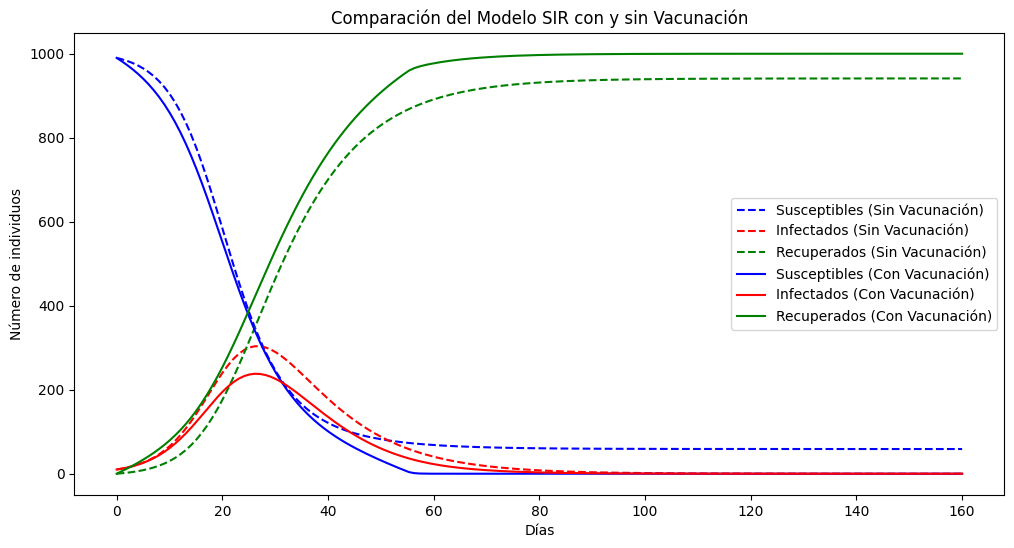

In [3]:
# Parámetros del modelo
N = 1000        # tamaño de la población
re = 3          # número de encuentros por día por persona
ri = 0.1        # tasa de infección por encuentro
beta = re * ri  # tasa de contacto por día
T = 10          # duración de la enfermedad en días
gamma = 1 / T   # tasa de recuperación
p = 5          # número de personas vacunadas cada día

# Condiciones iniciales
S0 = N - 10     
X0 = 10         
R0 = 0          


# --- Modelo SIR sin vacunación ---
def sir_model(y, t, beta, gamma, N):
    S, X, R = y
    dS_dt = -beta * S * X / N
    dX_dt = beta * S * X / N - gamma * X
    dR_dt = gamma * X
    return [dS_dt, dX_dt, dR_dt]


# --- Modelo SIR con vacunación ---
def sir_vacunacion_model(y, t, beta, gamma, N, p):
    S, X, R = y
    # Asegurarse de no vacunar más susceptibles de los que hay
    vacunados = min(S, p)
    dS_dt = -beta * S * X / N - vacunados
    dX_dt = beta * S * X / N - gamma * X
    dR_dt = gamma * X + vacunados
    return [dS_dt, dX_dt, dR_dt]



# Condiciones iniciales para ambos modelos
initial_conditions = [S0, X0, R0]


# Tiempo de simulación (en días)
days = 160
t = np.linspace(0, days, days)

# Resolución del sistema de ecuaciones diferenciales sin vacunación
solution_sin_vacunacion = odeint(sir_model, initial_conditions, t, args=(beta, gamma, N))
S_sin_vacunacion, X_sin_vacunacion, R_sin_vacunacion = solution_sin_vacunacion.T

# Resolución del sistema de ecuaciones diferenciales con vacunación
solution_con_vacunacion = odeint(sir_vacunacion_model, initial_conditions, t, args=(beta, gamma, N, p))
S_con_vacunacion, X_con_vacunacion, R_con_vacunacion = solution_con_vacunacion.T

# Gráfica de resultados
plt.figure(figsize=(12, 6))
plt.plot(t, S_sin_vacunacion, 'b--', label='Susceptibles (Sin Vacunación)')
plt.plot(t, X_sin_vacunacion, 'r--', label='Infectados (Sin Vacunación)')
plt.plot(t, R_sin_vacunacion, 'g--', label='Recuperados (Sin Vacunación)')

plt.plot(t, S_con_vacunacion, 'b', label='Susceptibles (Con Vacunación)')
plt.plot(t, X_con_vacunacion, 'r', label='Infectados (Con Vacunación)')
plt.plot(t, R_con_vacunacion, 'g', label='Recuperados (Con Vacunación)')

plt.xlabel('Días')
plt.ylabel('Número de individuos')
plt.legend()
plt.title('Comparación del Modelo SIR con y sin Vacunación')
plt.show()


Como vemos en la gráfica, añadir la varibale de personas vacunadas en el modelo tiene un efecto en la evolución de la epidemia. En el modelo sin vacunación (líneas discontinuas), la curva de infectados alcanza un pico más alto y se mantiene durante más tiempo, lo que indica una mayor propagación de la enfermedad en la población. Sin embargo, en el modelo con vacunación (líneas continuas), el número de infectados alcanza un pico más bajo, lo cual sugiere que la vacunación ayuda a contener la epidemia y a reducir el número máximo de personas infectadas en un momento dado. Si que es verdad que el cambio no es tan significativo a no ser que el parametro $p$ de personas vacunadas sea superior a 10, de esa forma se puede observar una mayor diferencia.

----------------------------------------------------------------------------------------------------
En el siguiente apartado, se calcula el número adecuado de personas vacunadas $p$ por día para controlar el brote de la enfermedad. Este valor mínimo de $p$, denominado $p*$, representa la cantidad de individuos que deben ser inmunizados diariamente para que el pico máximo de infectados se mantenga por debajo de un umbral establecido. En este caso, se ha fijado un umbral de control de infectados del 5% de la población total, lo que significa que buscamos un valor de $p$ tal que el número de infectados en el punto máximo no supere ese porcentaje.

El número mínimo de vacunados p* para controlar la enfermedad es 20 personas por día.
El pico máximo de infectados con este valor de p* es 99.88 personas.


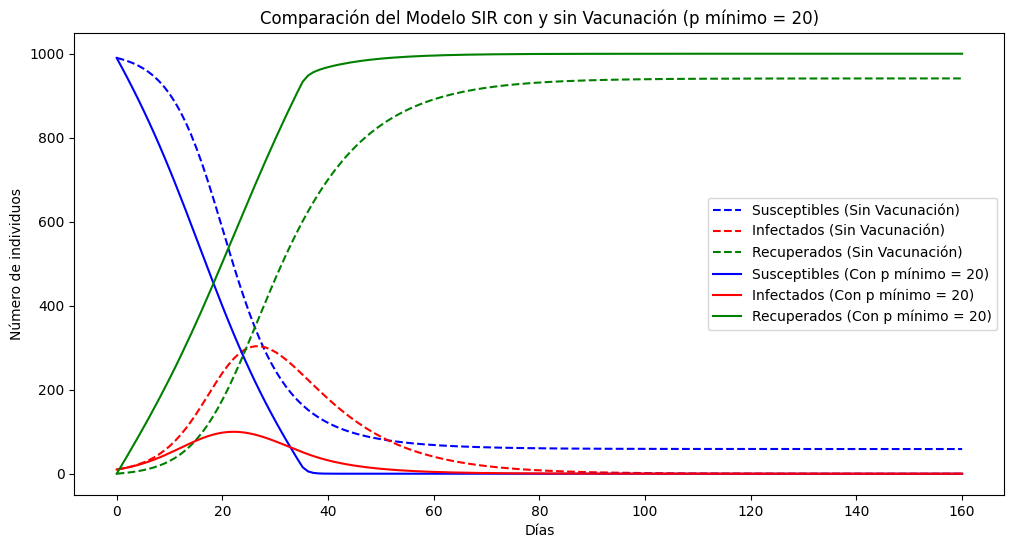

In [4]:
# Parámetros del modelo
N = 1000        # tamaño de la población
re = 3          # número de encuentros por día por persona
ri = 0.1        # tasa de infección por encuentro
beta = re * ri  # tasa de contacto por día   
T = 10          # duración de la enfermedad en días    
gamma = 1 / T   # tasa de recuperación
days = 160      # días de simulación

# Umbral de control de infectados (10% de la población)
max_infectados_umbral = 0.1 * N

# --- Función para encontrar el mínimo valor de p que controla la enfermedad ---
def encontrar_minimo_p(beta, gamma, N, max_infectados_umbral, days):
    p = 1
    while True:
        solution = odeint(sir_vacunacion_model, initial_conditions, t, args=(beta, gamma, N, p))
        S, X, R = solution.T

        max_infectados = max(X)
        
        # Si el pico de infectados está por debajo del umbral, hemos encontrado el mínimo p
        if max_infectados <= max_infectados_umbral:
            return p, max_infectados

        # Incrementar p si el umbral no se ha alcanzado
        p += 1

p_minimo, max_infectados_obtenidos = encontrar_minimo_p(beta, gamma, N, max_infectados_umbral, days)

print(f'El número mínimo de vacunados p* para controlar la enfermedad es {p_minimo} personas por día.')
print(f'El pico máximo de infectados con este valor de p* es {max_infectados_obtenidos:.2f} personas.')

# Simulación del modelo con el p mínimo encontrado para graficar
solution_con_p_minimo = odeint(sir_vacunacion_model, initial_conditions, t, args=(beta, gamma, N, p_minimo))
S_p_minimo, X_p_minimo, R_p_minimo = solution_con_p_minimo.T

# Resolución del sistema de ecuaciones diferenciales sin vacunación (para comparación)
solution_sin_vacunacion = odeint(sir_model, initial_conditions, t, args=(beta, gamma, N))
S_sin_vacunacion, X_sin_vacunacion, R_sin_vacunacion = solution_sin_vacunacion.T

# Gráfica de resultados
plt.figure(figsize=(12, 6))
plt.plot(t, S_sin_vacunacion, 'b--', label='Susceptibles (Sin Vacunación)')
plt.plot(t, X_sin_vacunacion, 'r--', label='Infectados (Sin Vacunación)')
plt.plot(t, R_sin_vacunacion, 'g--', label='Recuperados (Sin Vacunación)')

plt.plot(t, S_p_minimo, 'b', label=f'Susceptibles (Con p mínimo = {p_minimo})')
plt.plot(t, X_p_minimo, 'r', label=f'Infectados (Con p mínimo = {p_minimo})')
plt.plot(t, R_p_minimo, 'g', label=f'Recuperados (Con p mínimo = {p_minimo})')

plt.xlabel('Días')
plt.ylabel('Número de individuos')
plt.legend()
plt.title(f'Comparación del Modelo SIR con y sin Vacunación (p mínimo = {p_minimo})')
plt.show()


En la gráfica se muestra una comparación entre el modelo SIR sin vacunación (líneas discontinuas) y el modelo SIR con vacunación con el valor $p*$ encontrado (líneas continuas). Como se observa, el modelo con vacunación reduce significativamente el número de infectados y evita que el brote de la enfermedad alcance niveles altos.

Por otro lado, en este código se muestra otra forma de calcular el número de personas vacunadas necesarias para alcanzar la inmunidad del rebaño. Para ello, se calcula el nivel mínimo de vacunación diaria, $p*$, necesario para alcanzar la inmunidad de rebaño en función del tamaño de la población $N$. En este cálculo considera el umbral de inmunidad, que depende del número reproductivo básico $R0 = γ / β$, y el número de personas que necesitan ser inmunizadas para reducir la susceptibilidad de la población y así controlar la propagación.

Número mínimo de vacunados p* para inmunidad de rebaño: 4.17 por día (0.42% de la población diaria),
Total de 667 personas a vacunar para lograr el umbral de inmunidad.


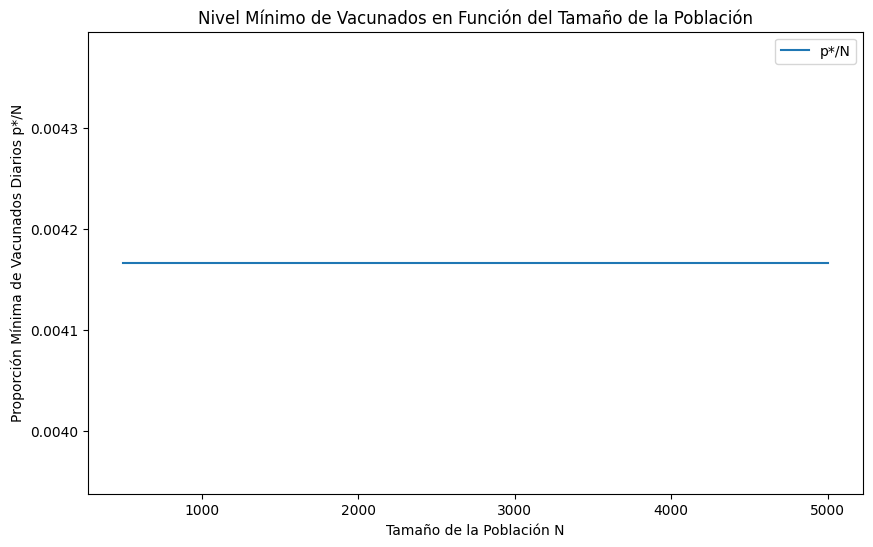

In [5]:
# Parámetros del modelo
N = 1000        # tamaño de la población
re = 3          # número de encuentros por día por persona
ri = 0.1        # tasa de infección por encuentro
beta = re * ri  # tasa de contacto por día       
T = 10          # duración de la enfermedad en días
gamma = 1 / T   # tasa de recuperación
days = 160      # días de simulación


# Calcula el número mínimo de vacunados diarios p* (inmunidad de rebaño)
def encontrar_p_estrella(beta, gamma, N):
    R0 = beta / gamma
    umbral = 1 - 1 / R0
    total_vacunados = umbral * N         # Personas a inmunizar para lograr el umbral de inmunidad
    p_estrella = total_vacunados / days  # Distribuido en los días de la simulación
    return p_estrella, total_vacunados

p_estrella, total_vacunados = encontrar_p_estrella(beta, gamma, N)
porcentaje = (p_estrella / N) * 100

print(f'Número mínimo de vacunados p* para inmunidad de rebaño: {p_estrella:.2f} por día ({porcentaje:.2f}% de la población diaria),')
print(f'Total de {total_vacunados:.0f} personas a vacunar para lograr el umbral de inmunidad.')



# p*/N en función de N
Ns = np.linspace(500, 5000, 10)

# Calcular p* para cada tamaño de población N
p_estrella_N = []
for N in Ns:
    p_estrella, _ = encontrar_p_estrella(beta, gamma, N)
    p_estrella_N.append(p_estrella)

# Calcular la proporción p*/N para cada valor de N
p_N = [p / N for p, N in zip(p_estrella_N, Ns)]

# Graficar p*/N en función del tamaño de la población
plt.figure(figsize=(10, 6))
plt.plot(Ns, p_N, label='p*/N')
plt.xlabel('Tamaño de la Población N')
plt.ylabel('Proporción Mínima de Vacunados Diarios p*/N')
plt.title('Nivel Mínimo de Vacunados en Función del Tamaño de la Población')
plt.legend()
plt.show()



La gráfica resultante de $p* / N$ frente a diferentes tamaños de población $N$ muestra que esta proporción es constante. Esto significa que el porcentaje de vacunación necesario para controlar la enfermedad y alcanzar la inmunidad de rebaño no depende del tamaño de la población, siempre que los parámetros de transmisión y recuperación $(β$ y $γ)$ permanezcan constantes.

----------------------------------------------------------------------------------------------------

## Ejercicio 2

Trabajaremos en este ejercicio con extensiones del modelo de Leslie. Supongamos que tenemos una población de peces salvajes dividida en tres grupos de edad de un año cada una y cuya matriz de Leslie es la siguiente: 
$$L=\left[ \begin{array}{lll} 0 & 2 & 3 \\ 1/3 &  0 &  0\\ 0 & 1/2 & 0 \end{array}\right].$$
Parte de la población se cosecha anualmente con fines comerciales. Supóngase que se puede seleccionar el grupo de edad que se extrae a través de la tecnología pesquera. Se nota $d_i$ la tasa de extracción anual de la población de hembras en cada año para el grupo de edad $i$, $i=1,2,3$. 

**Apartado 1**. (a) Escribir la ecuación en diferencias que determinaría la evolución de los individuos con esas tasas de extracción individualizadas por grupos de edad. Utilizar para ello notación matricial; (b) Estudiar la proporción de la población a largo plazo si no existiera cosecha alguna e indicar qué tipo de crecimiento describe (expansivo, estable o en extinción); (c) Estudiar la evolución y proporción de la población a largo plazo si se extrae a largo plazo el 50% de la población del grupo 1, 2 y 3, respectivamente. 

## Apartado 1

La matriz de **Leslie** se utiliza para modelar la dinámica poblacional, mostrando cómo se distribuyen las tasas de **fecundidad** y **supervivencia** entre diferentes grupos de edad en una población.

- **Elementos de la primera fila**: Representan las tasas de fecundidad o reproducción de cada grupo de edad, que contribuyen a la nueva generación (grupo 1). Por ejemplo:
  - L_{1,2} = 2 : Significa que el grupo de edad 2 contribuye con una tasa de reproducción de 2 a la población de edad 1.
  - L_{1,3} = 3 : Significa que el grupo de edad 3 contribuye con una tasa de reproducción de 3 a la población de edad 1.

- **Elementos de la subdiagonal** (elementos justo debajo de la diagonal principal): Representan las tasas de supervivencia o la proporción de individuos que pasan de un grupo de edad al siguiente.
  - L_{2,1} = $\frac{1}{3} $: Indica que el 33\% de los individuos en el grupo de edad 1 sobrevivirán para pasar al grupo de edad 2 en el siguiente periodo.
  - L_{3,2} = $\frac{1}{2} $: Indica que el 50\% de los individuos en el grupo de edad 2 sobrevivirán para pasar al grupo de edad 3.

- **Ceros en la matriz**: Indican transiciones que no ocurren. Por ejemplo,  L_{2,2} = 0  significa que los individuos en el grupo de edad 2 no permanecen a ese grupo en el siguiente periodo; o pasan al grupo siguiente o son eliminados (por muerte o transición de edad).



Proporción estable sin extracción: 
   Grupo 1: 0.6851633514575654 
   Grupo 2: 0.21429796098086157 
   Grupo 3: 0.10053868756157304
Valor propio dominante sin extracción: 1.0657487489560626
Tipo de crecimiento a largo plazo sin extracción: Expansivo


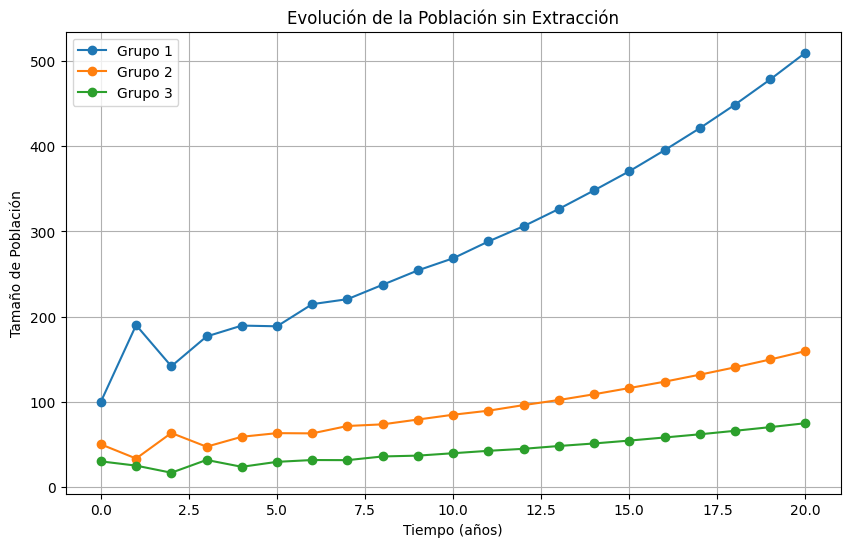

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Definir la matriz de Leslie
L = np.array([
    [0, 2, 3],
    [1/3, 0, 0],
    [0, 1/2, 0]
])

# Población inicial
N0 = np.array([100, 50, 30])  

# Matriz de identidad
I = np.eye(3)

# Función para calcular la evolución de la población 
def evolucion_poblacion(L, D, N0, t_max=20):
    poblacion = [N0]
    for _ in range(t_max):
        N_t = poblacion[-1]
        N_next = np.maximum(((I - D) @ L) @ N_t, 0) # Ecuación en diferencias
        poblacion.append(N_next)
    return np.array(poblacion)

# Evolución de la población sin extracción
evolucion_sin_extraccion = evolucion_poblacion(L, np.zeros_like(L), N0)

# Análisis de proporción a largo plazo sin extracción
valores_propios, vectores_propios = np.linalg.eig(L)
indice_valor_propio_mayor = np.argmax(np.abs(valores_propios))
proporcion_estable = np.abs(vectores_propios[:, indice_valor_propio_mayor])
proporcion_estable_normalizada = proporcion_estable / np.sum(proporcion_estable)

# Resultados del apartado 1-b
print("\nProporción estable sin extracción:", 
      "\n   Grupo 1:", proporcion_estable_normalizada[0].real,
      "\n   Grupo 2:", proporcion_estable_normalizada[1].real,
      "\n   Grupo 3:", proporcion_estable_normalizada[2].real)
print("Valor propio dominante sin extracción:", valores_propios[indice_valor_propio_mayor].real)
crecimiento_largo_plazo = "Expansivo" if valores_propios[indice_valor_propio_mayor] > 1 else "Estable" if valores_propios[indice_valor_propio_mayor] == 1 else "Extinción"
print(f"Tipo de crecimiento a largo plazo sin extracción: {crecimiento_largo_plazo}")

# Gráfico de evolución de la población sin extracción
s = np.arange(len(evolucion_sin_extraccion))

plt.figure(figsize=(10, 6))
plt.plot(s, evolucion_sin_extraccion[:, 0], label='Grupo 1', marker='o')
plt.plot(s, evolucion_sin_extraccion[:, 1], label='Grupo 2', marker='o')
plt.plot(s, evolucion_sin_extraccion[:, 2], label='Grupo 3', marker='o')
plt.title("Evolución de la Población sin Extracción")
plt.xlabel("Tiempo (años)")
plt.ylabel("Tamaño de Población")
plt.legend()
plt.grid(True)
plt.show()



Caso 1: Extracción al 50.0% en Grupo 1, 0% en Grupo 2, 0% en Grupo 3
Proporción estable con extracción: 
   Grupo 1: 0.5974901219035844 
   Grupo 2: 0.24804630871400066 
   Grupo 3: 0.154463569382415
Valor propio dominante con extracción: 0.8029281911124858
Tipo de crecimiento a largo plazo con extracción: Extinción


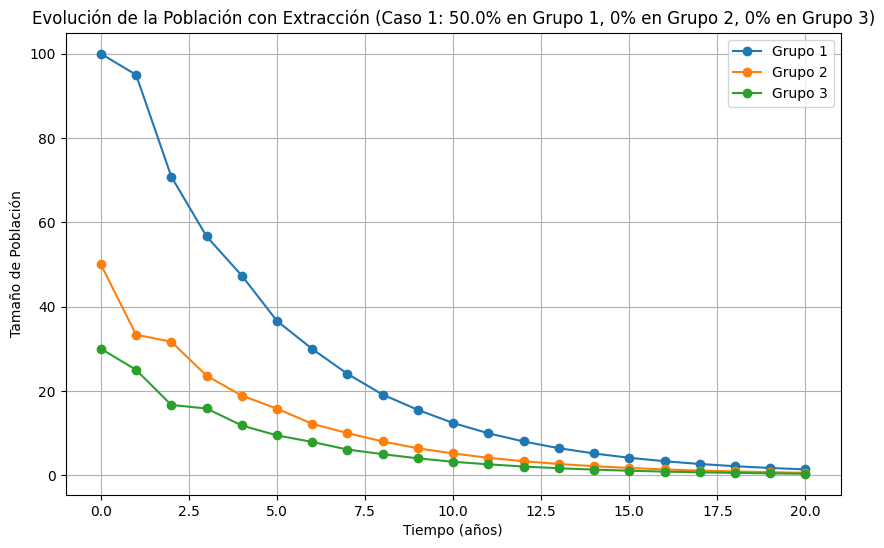


Caso 2: Extracción al 0% en Grupo 1, 50.0% en Grupo 2, 0% en Grupo 3
Proporción estable con extracción: 
   Grupo 1: 0.7480360769825725 
   Grupo 2: 0.15527251487378607 
   Grupo 3: 0.09669140814364145
Valor propio dominante con extracción: 0.8029281911124858
Tipo de crecimiento a largo plazo con extracción: Extinción


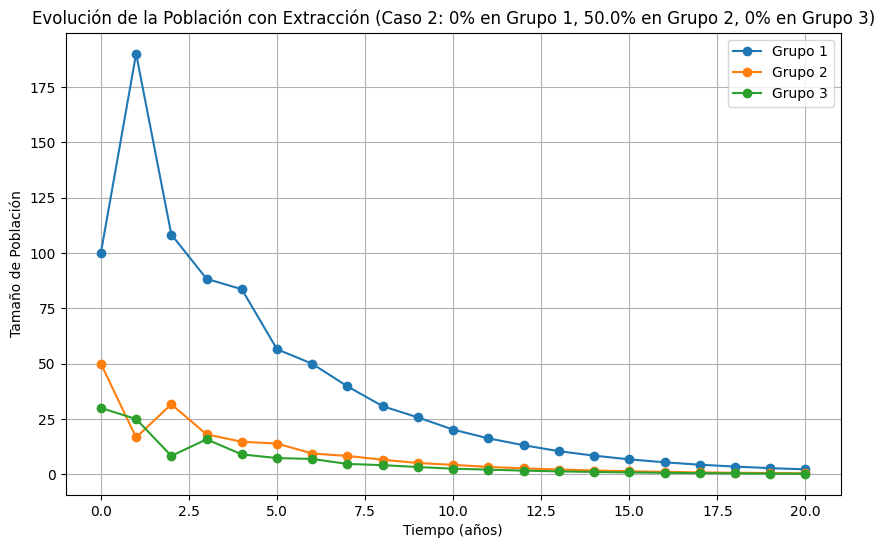


Caso 3: Extracción al 0% en Grupo 1, 0% en Grupo 2, 50.0% en Grupo 3
Proporción estable con extracción: 
   Grupo 1: 0.6962462162523539 
   Grupo 2: 0.24112415353250574 
   Grupo 3: 0.06262963021514027
Valor propio dominante con extracción: 0.9625003081776763
Tipo de crecimiento a largo plazo con extracción: Extinción


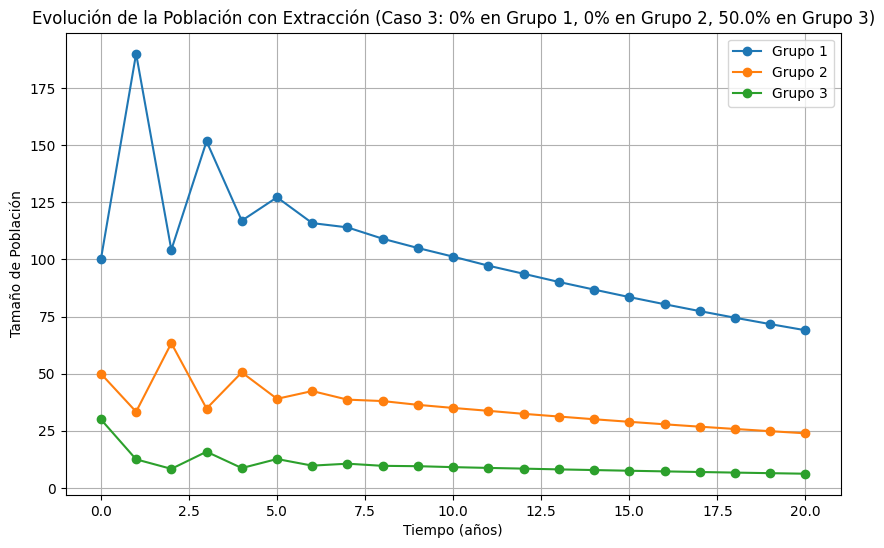

In [7]:
# Apartado C

# Configuración de los tres casos de extracción
casos_extraccion = [
    (0.5, 0, 0),
    (0, 0.5, 0), 
    (0, 0, 0.5)   
]

# Matriz identidad
I = np.diag([1, 1, 1])

for i, (d1, d2, d3) in enumerate(casos_extraccion, 1):
    D = np.diag([d1, d2, d3])
    
    # Evolución de la población 
    evolucion_con_extraccion = evolucion_poblacion(L, D, N0)

    # Análisis de proporción a largo plazo con extracción
    L_extraccion = (I - D) @ L
    valores_propios_extraccion, vectores_propios_extraccion = np.linalg.eig(L_extraccion)
    indice_valor_propio_mayor_extraccion = np.argmax(np.abs(valores_propios_extraccion))
    proporcion_estable_extraccion = np.abs(vectores_propios_extraccion[:, indice_valor_propio_mayor_extraccion])
    proporcion_estable_normalizada_extraccion = proporcion_estable_extraccion / np.sum(proporcion_estable_extraccion)

    # Resultados del caso
    print(f"\nCaso {i}: Extracción al {d1*100}% en Grupo 1, {d2*100}% en Grupo 2, {d3*100}% en Grupo 3")
    print("Proporción estable con extracción:", 
          "\n   Grupo 1:", proporcion_estable_normalizada_extraccion[0].real, 
          "\n   Grupo 2:", proporcion_estable_normalizada_extraccion[1].real, 
          "\n   Grupo 3:", proporcion_estable_normalizada_extraccion[2].real)
    print("Valor propio dominante con extracción:", valores_propios_extraccion[indice_valor_propio_mayor_extraccion].real)
    crecimiento_largo_plazo_extraccion = "Expansivo" if valores_propios_extraccion[indice_valor_propio_mayor_extraccion] > 1 else "Estable" if valores_propios_extraccion[indice_valor_propio_mayor_extraccion] == 1 else "Extinción"
    print(f"Tipo de crecimiento a largo plazo con extracción: {crecimiento_largo_plazo_extraccion}")

    # Gráfico de evolución de la población con extracción
    t = np.arange(len(evolucion_con_extraccion))

    plt.figure(figsize=(10, 6))
    plt.plot(t, evolucion_con_extraccion[:, 0], label='Grupo 1', marker='o')
    plt.plot(t, evolucion_con_extraccion[:, 1], label='Grupo 2', marker='o')
    plt.plot(t, evolucion_con_extraccion[:, 2], label='Grupo 3', marker='o')
    plt.title(f"Evolución de la Población con Extracción (Caso {i}: {d1*100}% en Grupo 1, {d2*100}% en Grupo 2, {d3*100}% en Grupo 3)")
    plt.xlabel("Tiempo (años)")
    plt.ylabel("Tamaño de Población")
    plt.legend()
    plt.grid(True)
    plt.show()

### (a) Ecuaciones en diferencias
El código simula la evolución de una población dividida en grupos de edad mediante una función llamada evolucion_poblacion, que utiliza una matriz de Leslie L para las tasas de fecundidad y supervivencia y una matriz de extracción D para reducir la población en cada grupo. La función itera a lo largo de los años, calculando la población en cada paso mediante esta ecuación en diferencias:

$$N_{t+1} = ((I - D) \cdot L) \cdot N_t$$

Esta fórmula se aplica para incluir los efectos de la extracción en cada grupo de edad antes de que las tasas de nacimiento y transición actúen sobre la población restante.

1. **\( I - D \)**: 
   - Esta matriz ajusta cada grupo de edad según la tasa de extracción, reduciendo la población disponible en cada grupo.
   
2. **Multiplicación con la Matriz de Leslie \( L \)**:
   - Al multiplicar la matriz ajustada \((I - D)\) por \( L \), aplicamos la extracción a cada grupo antes de que se produzcan las transiciones de edad y nacimientos en la población.

Esta formulación permite observar cómo la extracción reduce la población en cada grupo antes de que se apliquen los efectos de crecimiento y envejecimiento, reflejando la estructura de la población y su sostenibilidad a largo plazo bajo diferentes niveles de extracción.

### (b) Proporción de la población a largo plazo sin extracción

La matriz de Leslie L describe la dinámica de una población, donde cada fila y columna representan los grupos de edad y sus transiciones (supervivencia y fecundidad). 

Los valores propios de la matriz L son indicadores clave de la tendencia de crecimiento de la población. El valor propio de mayor magnitud (dominante) representa la tasa de crecimiento o decrecimiento a largo plazo de la población. Si el valor propio dominante es mayor que 1, la población crece exponencialmente; si es menor que 1, la población decrece exponencialmente; y si es igual a 1, la población se mantiene estable. En este caso, el valor propio dominante es mayor que 1, lo que significa que la población crecerá año tras año.


La proporción de la población a largo plazo se puede encontrar calculando el vector propio dominante de la matriz L. La proporción estable representa la estructura de la población a largo plazo, es decir, la fracción de la población que estará en cada grupo de edad cuando la población alcance el equilibrio.  En este caso, la proporción de la población a largo plazo sin extracción es aproximadamente de [0.7, 0.2, 0.1], lo que indica que el 70% de la población pertenecerá al grupo de edad 1, el 20% al grupo de edad 2 y el 10% al grupo de edad 3.


### (c) Proporción de la población a largo plazo con extracción

En este análisis, se estudió la proporción de la población a largo plazo bajo una extracción del 50% aplicada individualmente a cada grupo de edad. Aquí están los resultados para cada caso:

1. **Caso 1**: Extracción del 50% en el **Grupo 1**.
   - **Proporción estable**: Grupo 1 = 59.7%, Grupo 2 = 24.8%, Grupo 3 = 15.4%.
   - **Valor propio dominante**: 0.803, lo que indica **extinción** a largo plazo.

2. **Caso 2**: Extracción del 50% en el **Grupo 2**.
   - **Proporción estable**: Grupo 1 = 74.8%, Grupo 2 = 15.5%, Grupo 3 = 9.7%.
   - **Valor propio dominante**: 0.803, indicando también **extinción** a largo plazo.

3. **Caso 3**: Extracción del 50% en el **Grupo 3**.
   - **Proporción estable**: Grupo 1 = 69.6%, Grupo 2 = 24.1%, Grupo 3 = 6.3%.
   - **Valor propio dominante**: 0.963, lo que también sugiere una tendencia hacia la **extinción** aunque menos pronunciada.

En todos los casos, una extracción del 50% en cualquiera de los grupos de edad tiende a llevar la población hacia la extinción, con el **Grupo 3** mostrando la menor disminución en sostenibilidad. Esto sugiere que, aunque el **Grupo 3** es menos sensible a la extracción, una tasa del 50% sigue siendo insostenible a largo plazo para la población en su totalidad.


--------------------------------------------------------------------------------------------------------------
**Apartado 2**. Se entiende por *extracción sostenible* aquella que mantiene la población estable a largo plazo. (a) Encontrar numericamente (computacionalmente) la extracción máxima sostenible si solo se permite extraer un porcentaje idéntico de los grupos de edad 2 y 3, esto es, $d_1=0$, $d_2=d_3$; (b) Lo mismo cuando solo se permite extraer un porcentaje de la población 3, esto es, $d_1=d_2=0$; (c) Encontrar esa tasa de extracción analíticamente. 

Opcional (lo comentó en clase): Cual seria mas rentable economicamente. Habria que añadir precios diferentes de mercado para cada grupo de edad.

## Apartado 2

Para encontrar la tasa de extracción máxima que permite que la población sea sostenible a largo plazo, vamos a buscar de manera iterativa los valores de extracción que hacen que el valor propio dominante de la matriz de Leslie sea lo más cercano a 1 posible con un paso de 0.001.

Apartado A: Para d2 y d3 = 0.103, la población es sostenible (valor propio dominante ≈ 1): 1.00674
Apartado B: Para d3 = 0.333, la población es sostenible (valor propio dominante ≈ 1): 1.01819


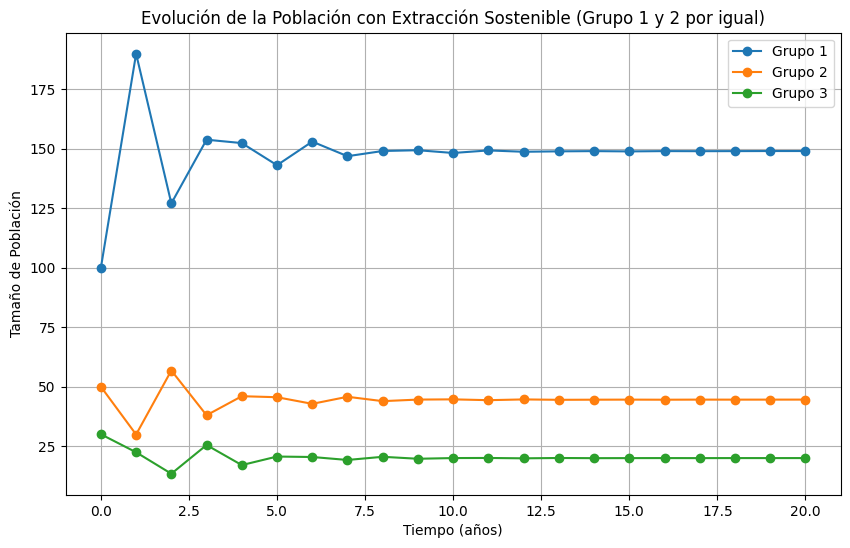

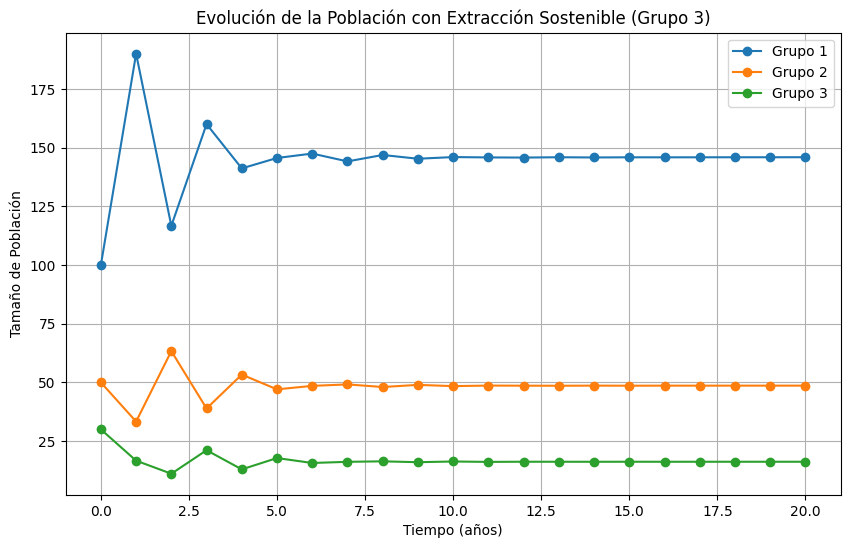

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la matriz de Leslie
L = np.array([
    [0, 2, 3],
    [1/3, 0, 0],
    [0, 1/2, 0]
])

# Matriz identidad
I = np.diag([1, 1, 1])

# Función para calcular el valor propio dominante
def valor_propio_dominante(matrix):
    valores_propios, _ = np.linalg.eig(matrix)
    return np.max(np.abs(valores_propios))

# Función para calcular la evolución de la población
def evolucion_poblacion(L, D, N0, t_max=20):
    poblacion = [N0]
    for _ in range(t_max):
        N_t = poblacion[-1]
        N_next = np.maximum(((I - D) @ L) @ N_t, 0) 
        poblacion.append(N_next)
    return np.array(poblacion)

# Parámetros iniciales apartado a
paso = 0.001  
da = 0  
poblacion_sostenible = True

# Apartado a: extracción para el grupo 1 = 0 y grupo 2 = grupo 3 
while poblacion_sostenible:
    D = np.diag([0, da, da])
    
    L_ajustada = (I - D) @ L
    valor_propio = valor_propio_dominante(L_ajustada)
     
    if valor_propio >= 1:
        da += paso  
    else:
        poblacion_sostenible = False  

# Extracción sostenible apartado a
da_sostenible = da - paso
Da_final = np.diag([0, da_sostenible, da_sostenible]) 
valor_propio_sostenible_a = valor_propio_dominante(L - Da_final)
print(f"Apartado A: Para d2 y d3 = {da_sostenible :.3f}, la población es sostenible (valor propio dominante ≈ 1): {valor_propio_sostenible_a :.5f}")

# Apartado b: extracción para el grupo 1 = grupo 2 = 0 y grupo 3 = db
db = 0
poblacion_sostenible = True
while poblacion_sostenible:
    D = np.diag([0, 0, db])
    
    L_ajustada = (I - D) @ L
    valor_propio = valor_propio_dominante(L_ajustada)
    
    if valor_propio >= 1:
        db += paso  
    else:
        poblacion_sostenible = False  

# Extracción sostenible apartado b
db_sostenible = db - paso
Db_final = np.diag([0, 0, db_sostenible]) 
valor_propio_sostenible_b = valor_propio_dominante(L - Db_final)
print(f"Apartado B: Para d3 = {db_sostenible :.3f}, la población es sostenible (valor propio dominante ≈ 1): {valor_propio_sostenible_b :.5f}")


# Gráfica apartado a
N0 = np.array([100, 50, 30])   
evolucion_a = evolucion_poblacion(L, Da_final, N0)
t_a = np.arange(len(evolucion_a))

plt.figure(figsize=(10, 6))
plt.plot(t_a, evolucion_a[:, 0], label='Grupo 1', marker='o')
plt.plot(t_a, evolucion_a[:, 1], label='Grupo 2', marker='o')
plt.plot(t_a, evolucion_a[:, 2], label='Grupo 3', marker='o')
plt.title("Evolución de la Población con Extracción Sostenible (Grupo 1 y 2 por igual)")
plt.xlabel("Tiempo (años)")
plt.ylabel("Tamaño de Población")
plt.legend()
plt.grid(True)
plt.show()

# Gráfica apartado b
evolucion_b = evolucion_poblacion(L, Db_final, N0)
t_b = np.arange(len(evolucion_b))

plt.figure(figsize=(10, 6))
plt.plot(t_b, evolucion_b[:, 0], label='Grupo 1', marker='o')
plt.plot(t_b, evolucion_b[:, 1], label='Grupo 2', marker='o')
plt.plot(t_b, evolucion_b[:, 2], label='Grupo 3', marker='o')
plt.title("Evolución de la Población con Extracción Sostenible (Grupo 3)")
plt.xlabel("Tiempo (años)")
plt.ylabel("Tamaño de Población")
plt.legend()
plt.grid(True)
plt.show()



### (a) y (b) Extracción máxima sostenible

Para el caso en el que se extrae un porcentaje idéntico de los grupos de edad 2 y 3, y para el caso en el que solo se extrae un porcentaje de la población 3. Para encontrar los valores de extracción sostenible, se utilizó un enfoque iterativo que ajusta las tasas de extracción hasta que el valor propio dominante de la matriz de Leslie sea lo más cercano a 1 posible. Los resultados obtenidos son, para el caso (a): d2 y d3 = 0.103 y para el caso (b): d3 = 0.333.

### (c) Tasa de extracción analítica

### Caso a) Extracción en los Grupos 2 y 3

Para resolver la ecuación analíticamente y encontrar la tasa de extracción sostenible $d$ que hace que el valor propio dominante de la matriz ajustada sea igual a 1, comenzamos con el siguiente ajuste de la matriz Leslie con extracción en los grupos 2 y 3:

$$
D = \begin{pmatrix} 0 & 0 & 0 \\ 0 & d & 0 \\ 0 & 0 & d \end{pmatrix}
$$

La matriz ajustada $(I - D) \cdot L$ se convierte en:

$$
(I - D) \cdot L = \begin{pmatrix} 0 & 2 & 3 \\ \frac{1}{3}(1 - d) & 0 & 0 \\ 0 & \frac{1}{2}(1 - d) & 0 \end{pmatrix}
$$

Para que esta matriz tenga un valor propio dominante igual a 1, planteamos el polinomio característico y buscamos que el valor propio dominante sea 1. Esto equivale a resolver la ecuación:

$$
\text{det}((I - D) \cdot L - I) = 0
$$

Sustituyendo $\lambda = 1$, la matriz se convierte en:

$$
(I - D) \cdot L - I = \begin{pmatrix} -1 & 2 & 3 \\ \frac{1}{3}(1 - d) & -1 & 0 \\ 0 & \frac{1}{2}(1 - d) & -1 \end{pmatrix}
$$

### Paso 1: Expansión del Determinante

Calculamos el determinante de esta matriz y lo igualamos a cero para encontrar $d$:

$$
\text{det} \begin{pmatrix} -1 & 2 & 3 \\ \frac{1}{3}(1 - d) & -1 & 0 \\ 0 & \frac{1}{2}(1 - d) & -1 \end{pmatrix} = 0
$$

Usando la expansión del determinante a lo largo de la primera fila:

$$
= -1 \cdot \begin{vmatrix} -1 & 0 \\ \frac{1}{2}(1 - d) & -1 \end{vmatrix} - 2 \cdot \begin{vmatrix} \frac{1}{3}(1 - d) & 0 \\ 0 & -1 \end{vmatrix} + 3 \cdot \begin{vmatrix} \frac{1}{3}(1 - d) & -1 \\ 0 & \frac{1}{2}(1 - d) \end{vmatrix}
$$

### Paso 2: Calcular los Determinantes de las Submatrices

1. Para el primer término:
   $$
   \begin{vmatrix} -1 & 0 \\ \frac{1}{2}(1 - d) & -1 \end{vmatrix} = (-1)(-1) - (0) = 1
   $$

2. Para el segundo término:
   $$
   \begin{vmatrix} \frac{1}{3}(1 - d) & 0 \\ 0 & -1 \end{vmatrix} = \frac{1}{3}(1 - d) \cdot (-1) = -\frac{1}{3}(1 - d)
   $$

3. Para el tercer término:
   $$
   \begin{vmatrix} \frac{1}{3}(1 - d) & -1 \\ 0 & \frac{1}{2}(1 - d) \end{vmatrix} = \frac{1}{3}(1 - d) \cdot \frac{1}{2}(1 - d) = \frac{1}{6}(1 - d)^2
   $$

### Paso 3: Sustituir y Simplificar

Sustituyendo estos valores en la expansión del determinante:

$$
= -1 \cdot 1 - 2 \cdot \left(-\frac{1}{3}(1 - d)\right) + 3 \cdot \frac{1}{6}(1 - d)^2
$$

Simplificamos cada término:

1. Primer término: $-1 \cdot 1 = -1$
2. Segundo término: $-2 \cdot \left(-\frac{1}{3}(1 - d)\right) = \frac{2}{3}(1 - d)$
3. Tercer término: $3 \cdot \frac{1}{6}(1 - d)^2 = \frac{1}{2}(1 - d)^2$

Juntando todos los términos:

$$
-1 + \frac{2}{3}(1 - d) + \frac{1}{2}(1 - d)^2 = 0
$$

### Paso 4: Resolver la Ecuación

Esta es una ecuación en $d$. Expandiendo y resolviendo, obtenemos:

$$
\frac{1}{2}d^2 - \frac{5}{3}d + 0.166 = 0
$$

Multiplicamos toda la ecuación por 6 para eliminar los denominadores:

$$
3d^2 - 10d + 1 = 0
$$

### Paso 5: Aplicar la Fórmula Cuadrática

Usamos la fórmula cuadrática para resolver $d$:

$$
d = \frac{-(-10) \pm \sqrt{(-10)^2 - 4 \cdot 3 \cdot 1}}{2 \cdot 3}
$$

Simplificamos:

$$
d = \frac{10 \pm \sqrt{100 - 12}}{6}
$$

$$
d = \frac{10 \pm \sqrt{88}}{6}
$$

$$
d = \frac{10 \pm 9.38}{6}
$$

Esto nos da dos soluciones:

1. $d = \frac{10 + 9.38}{6} = 3.23$
2. $d = \frac{10 - 9.38}{6} = 0.103$

### Solución

La tasa de extracción sostenible que cumple con el valor propio dominante de 1 es aproximadamente:

$$
d \approx 0.103
$$

Por lo tanto, para que la población se mantenga estable a largo plazo con extracción en los grupos 2 y 3, la tasa de extracción sostenible es de aproximadamente **10.3%** en cada uno de estos grupos.


### Caso b) Extracción en el Grupo 3

Para este caso, donde solo se aplica la extracción al grupo 3, la matriz de extracción \( D \) es:

$$
D = \begin{pmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & d \end{pmatrix}
$$

La matriz ajustada \((I - D) \cdot L\) se convierte en:

$$
(I - D) \cdot L = \begin{pmatrix} 0 & 2 & 3(1 - d) \\ \frac{1}{3} & 0 & 0 \\ 0 & \frac{1}{2} & 0 \end{pmatrix}
$$

Para que esta matriz tenga un valor propio dominante igual a 1, planteamos el polinomio característico y resolvemos en función de \( d \), estableciendo que el valor propio dominante sea 1. Esto equivale a resolver:

$$
\text{det}((I - D) \cdot L - I) = 0
$$

Sustituyendo \(\lambda = 1\), la matriz se convierte en:

$$
(I - D) \cdot L - I = \begin{pmatrix} -1 & 2 & 3(1 - d) \\ \frac{1}{3} & -1 & 0 \\ 0 & \frac{1}{2} & -1 \end{pmatrix}
$$

### Paso 1: Expansión del Determinante

Calculamos el determinante de la matriz:

$$
\text{det}((I - D) \cdot L - I) = \text{det} \begin{pmatrix} -1 & 2 & 3(1 - d) \\ \frac{1}{3} & -1 & 0 \\ 0 & \frac{1}{2} & -1 \end{pmatrix}
$$

Usando la expansión del determinante a lo largo de la primera fila:

$$
= -1 \cdot \begin{vmatrix} -1 & 0 \\ \frac{1}{2} & -1 \end{vmatrix} - 2 \cdot \begin{vmatrix} \frac{1}{3} & 0 \\ 0 & -1 \end{vmatrix} + 3(1 - d) \cdot \begin{vmatrix} \frac{1}{3} & -1 \\ 0 & \frac{1}{2} \end{vmatrix}
$$

### Paso 2: Calcular los Determinantes de las Submatrices

1. Para el primer término:
   $$
   \begin{vmatrix} -1 & 0 \\ \frac{1}{2} & -1 \end{vmatrix} = (-1)(-1) - (0) = 1
   $$

2. Para el segundo término:
   $$
   \begin{vmatrix} \frac{1}{3} & 0 \\ 0 & -1 \end{vmatrix} = \frac{1}{3} \cdot (-1) = -\frac{1}{3}
   $$

3. Para el tercer término:
   $$
   \begin{vmatrix} \frac{1}{3} & -1 \\ 0 & \frac{1}{2} \end{vmatrix} = \frac{1}{3} \cdot \frac{1}{2} = \frac{1}{6}
   $$

### Paso 3: Sustituir y Simplificar

Sustituyendo estos valores en la expansión del determinante:

$$
= -1 \cdot 1 - 2 \cdot \left(-\frac{1}{3}\right) + 3(1 - d) \cdot \frac{1}{6}
$$

Simplificamos cada término:

1. Primer término: \(-1 \cdot 1 = -1\)
2. Segundo término: \(-2 \cdot \left(-\frac{1}{3}\right) = \frac{2}{3}\)
3. Tercer término: \(3(1 - d) \cdot \frac{1}{6} = \frac{1}{2}(1 - d)\)

Juntando todos los términos:

$$
-1 + \frac{2}{3} + \frac{1}{2}(1 - d) = 0
$$

### Paso 4: Resolver la Ecuación

Expandiendo y resolviendo la ecuación en \( d \):

$$
-1 + \frac{2}{3} + \frac{1}{2} - \frac{1}{2}d = 0
$$

Simplificamos las constantes:

$$
\frac{1}{6} - \frac{1}{2}d = 0
$$

Multiplicamos por 6 para eliminar denominadores:

$$
1 - 3d = 0
$$

Despejando \( d \):

$$
d = \frac{1}{3}
$$

### Solución

La tasa de extracción sostenible que cumple con el valor propio dominante de 1 es:

$$
d = \frac{1}{3}
$$

Por lo tanto, para que la población se mantenga estable a largo plazo con extracción en el grupo 3, la tasa de extracción sostenible es aproximadamente **33.3%**.


### Opcional: Que extracción sería más rentable económicamente

In [9]:
import pandas as pd

d_a = 0.115
d_b = 0.5

# Definir la población inicial para cada grupo de edad
Poblacion_1, Poblacion_2, Poblacion_3 = 100, 50, 30  # Tamaños iniciales de población para cada grupo de edad

# Definir nuevas configuraciones de precios para cada grupo de edad (sin seguir un patrón específico)
configuraciones_precios_variadas = [
    (20, 10, 15),
    (15, 25, 20),
    (18, 12, 14),
    (20, 20, 20),
    (10, 30, 15)
]

# Almacenar los resultados de ingresos para cada configuración variada
resultados_variados = []

for precios in configuraciones_precios_variadas:
    p1, p2, p3 = precios
    
    # Calcular los ingresos para el caso (a): extracción en los grupos 2 y 3
    Ingreso_a = d_a * p2 * Poblacion_2 + d_a * p3 * Poblacion_3
    
    # Calcular los ingresos para el caso (b): extracción solo en el grupo 3
    Ingreso_b = d_b * p3 * Poblacion_3
    
    # Guardar los resultados
    resultados_variados.append((precios, Ingreso_a, Ingreso_b))

# Crear un DataFrame para mostrar los resultados de configuraciones variadas
df_resultados_variados = pd.DataFrame(resultados_variados, columns=["Precios (p1, p2, p3)", "Ingreso Caso (a)", "Ingreso Caso (b)"])
print(df_resultados_variados)

  Precios (p1, p2, p3)  Ingreso Caso (a)  Ingreso Caso (b)
0         (20, 10, 15)            109.25             225.0
1         (15, 25, 20)            212.75             300.0
2         (18, 12, 14)            117.30             210.0
3         (20, 20, 20)            184.00             300.0
4         (10, 30, 15)            224.25             225.0


En conclusión, vemos que la extracción única del grupo 3 es más rentable económicamente que la extracción de los grupos 2 y 3 con diferentes configuraciones de precios.